<a href="https://colab.research.google.com/github/vivian-xia/Data-Engineering-Algorithms/blob/main/Assignment_9_Implement_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Vivian Xia
## Matrix Chain Multiplication

With a sequence of matrices, there are generally multiple ways to mutliple the matrices. Therefore, it is helpful to decide the most efficient sequence in which to multiply the matrices to compute the least number of operations, optimizing the cost of matrix multipication. 

Matrix multiplication follows the associative property where the order in which the matrices are multipled does not matter because the result will always be the same. The only aspect that needs to be considered with matrix multiplication is that the number of columns in the first matrix must equal the number of rows in the second matrix. In order words, a matrix of m columns and n rows can be multipled with n columns and p rows. 

In terms of this algorithm, the matrix chain is is represented by an array p[ ] where the dimensions of the matrix are Matrix Ai has dimension p[i-1] x p[i] for i = 1...n.

One solution is to place paraenthesis at all possible places. However, this method has an exponential time complexity as well as calls on the same subproblems to be evaluated multiple times. 

A more efficient method uses dynamic programming. To perform dynamic programming, a temproary grid or array of m[ ][ ] is used and filled out bottom-up using the tabulation method that solves all sub-problems at least once. 

For example, A1:(2x2), A2:(2x4), A3:(4x3). The matrix chain consists of 3 matrices, so the grid is 3x3. However, there is an extra column and row (the 0th column and 0th row) added in m[ ] [ ] that is not used so the grid is actually 4x4, as seen by the following image: 

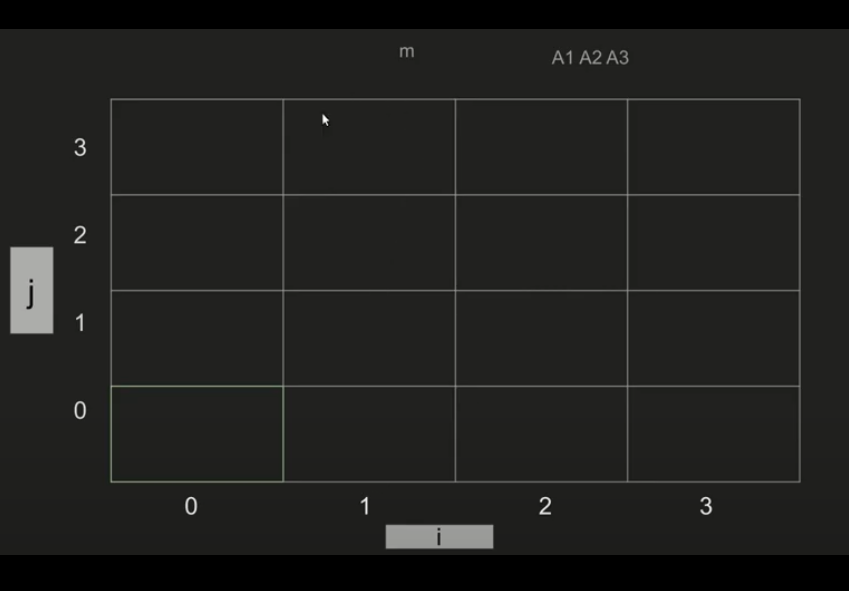




The matrix is filled out in a diagonal manner so, the main diagonal is considered first. Each cell in the grid represents the cost, operations for each sequence. In i=1 and j=1, the cost is 0 because A1xA1 is not a possible sequence. Therefore, the diagonal in the matrix will all have the cost of 0. 

In i=1 and j=2, the cell represents the cost of the sequence A1xA2 in which would evaluate to be (2x2x4)=16 operations. In i=2 and j=3, the cost of the sequence A2xA3 is (2x4x3)=24 operations. 

In i=1 and j=3, the cell represents the cost of A1xA2xA3 which could be (A1)(A2xA3) or (A1xA2)(A3). Using the costs for the sequences of A1, A3, A2xA3, and A1xA2, the costs for the possible sequences of A1xA2xA3 can be evaluated. The minimum cost is filled into the cell. 
- (A1)(A2xA3) 
  - A1 has a cost of 0 and a shape of 2x2
  - A2xA3 has a cost of 24 and its resulting shape is 2x3
  - The cost to multiply these together is evaluated as 2x2x3=12.
  - This cost is added to the costs of subproblem costs  as 0+24+12=36 operations. 
- (A1xA2)(A3) 
  - A1xA2 has a cost of 16 and a shape of 2x4
  - A3 has a cost of 0 and shape of 4x3
  - The cost to multiply these together is 2x4x3=24. 
  - This cost is added to the costs of the subproblems, resulting in 40 operations.

The cost of the sequence (A1)(A2xA3) is used to fill in the grid since its cost was smaller than the cost of the other possible sequence. 

The resulting grid should look like the following: 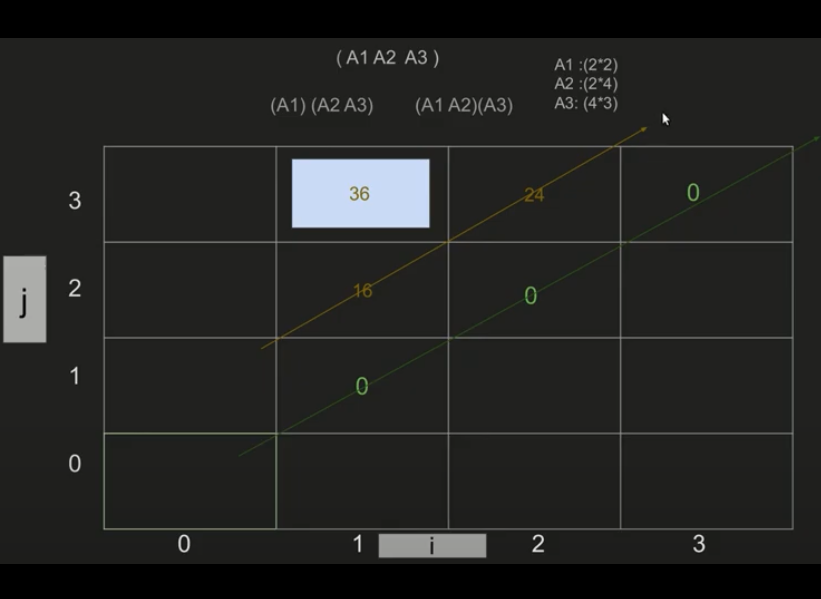

Because it fills the grid in a diagonal manner, the loop runs m-2 times where m is the number of matrice + 1 (for the extra row and column).

In [31]:
maxint=int(1e9+7)
# Matrix Ai has dimension p[i-1] x p[i] for i = 1..n

def MatrixChainOrder(p, n):
  # For simplicity of the program,
	# one extra row and one extra column are allocated in m[][].
	# 0th row and 0th column of m[][] are not used
  m = [[0 for x in range(n)] for x in range(n)]

	# m[i, j] = Minimum number of scalar multiplications needed
	# to compute the matrix A[i]A[i + 1]...A[j] =  A[i..j] where
	# dimension of A[i] is p[i-1] x p[i]

	# cost is zero when multiplying one matrix - fill in diagonal elements as 0.
  for i in range(1, n):
    m[i][i] = 0

	# L is chain length - use loop to fill in the rest of the matrix.
  # loop runs for n - 2 times which represents which diagonal is being evaluated
  for L in range(2, n):
    for i in range(1, n-L + 1): #i always starts on 1 in the grid
      #based on the value of i, the value of j is decided
      j = i + L-1
      m[i][j] = maxint #initialized to maxint
      for k in range(i, j):
				# q = cost / scalar multiplications  
        q = m[i][k] + m[k + 1][j] + p[i-1]*p[k]*p[j]
        if q < m[i][j]: #use minimum cost so far
          m[i][j] = q

  return m[1][n-1] #return cost of the whole chain

The algorithm uses the same steps as the manual process that was demonstrated in the above example. The algorithm creates the grid with the extra row and column. The main diagonal is filled in first by setting the cost to 0. The loop then evaluates the cost of the next diagonal in the grid. It fills in the cell based on the minimum cost for that sequence. After going through each diagonal, the minimum cost for the chain is returned. 

Using the same example from above, the matrix chain optimal sequence is evaluated using the dynamic programming algorithm. The minimum number of operations is 36.

In [32]:
arr = [2,2,4,3]
size = len(arr)

print("Minimum number of multiplications is " + str(MatrixChainOrder(arr, size)))

Minimum number of multiplications is 36


This matrix chain multiplication algorithm can be applied to any situation that uses matrix multiplication. An example application includes the total revenue of a grocery store from selling fruit. The first matrix is the number of apples, bananas, kiwis, bananas, and lemons sold on Friday, Saturday, Sunday, resulting in a 4x3 matrix. The second matrix is the assumed fixed weight in pounds of each fruit, resulting in a 3x1 matrix. The third matrix is the price per pound for each fruit as a 1x4 matrix. Using the algorithm, the optimal sequence has 28 operations. 

In [33]:
arr = [4,3,1,4]
size = len(arr)

print("Minimum number of multiplications is " + str(MatrixChainOrder(arr, size)))

Minimum number of multiplications is 28


The total revenue of fruits is only for the one location. Another matrix is added to the sequence to find the total revenue from selling each type of fruit for the eight store locations. The number of operations increase to 76.

In [35]:
arr = [4,3,1,4,8]
size = len(arr)

print("Minimum number of multiplications is " + str(MatrixChainOrder(arr, size)))

Minimum number of multiplications is 76


The time complexity of this algorithm is O(N^3), so this algorithm scales well with an increased number of matrices in the chain. This is useful to data engineers to find the most efficient sequence for the minimum number of multiplication operations. Compared with a naive algorithm that considers each possible placement of the parentheses, dynamic programming is more efficient and scales better while finding the most efficient sequence and avoids overlapping subproblems. 

References: 

Matrix chain multiplication: DP-8. GeeksforGeeks. (2022, February 28). Retrieved 2022, from https://www.geeksforgeeks.org/matrix-chain-multiplication-dp-8/ 